In [1]:
/bin/rm -rf 11272
download_chandra_obsid 11272 evt2,asol,msk,bpix 


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       20 Mb  ####################            7 s  2991.1 kb/s
  asol     fits       17 Mb  ####################            7 s  2446.0 kb/s
  bpix     fits       84 Kb  ####################          < 1 s  530.9 kb/s
  msk      fits        5 Kb  ####################          < 1 s  59.0 kb/s

      Total download size for ObsId 11272 = 37 Mb
      Total download time for ObsId 11272 = 14 s



In [2]:
cd 11272

In [3]:
curl -O http://soliton.vm.bytemark.co.uk/pub/cpt-city/neota/othr/sunset-in-atlantis.sao

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   673  100   673    0     0   2250      0 --:--:-- --:--:-- --:--:--  2250


In [4]:
download_obsid_caldb "./primary/*evt2.fits.gz" out=./CALDB

download_obsid_caldb
          infile = ./primary/*evt2.fits.gz
          outdir = ./CALDB
      background = no
         missing = no
         clobber = no
         verbose = 1
            mode = ql

Retrieving files for CALDB_VER = 4.9.4
Retrieving CALDB index files
Processing infile=./primary/acisf11272N003_evt2.fits.gz
Retrieving CALDB data files
    Filename:                               0------------------1
    telD1999-07-23geomN0006.fits            ####################
    telD1999-07-23aimptsN0002.fits          ####################
    telD1999-07-23tdetN0001.fits            ####################
    telD1999-07-23skyN0002.fits             ####################
    telD1999-07-23sgeomN0001.fits           ####################
    hrmaD1996-12-20axeffaN0008.fits         ####################
    hrmaD1996-12-20vignetN0003.fits         ####################
    acisD1997-04-17qeN0006.fits             ####################
    acisD2010-02-01qeuN0007.fits            ##################

In [5]:
source CALDB/config/caldbinit-4.9.4.sh

In [6]:
merge_obs "./primary/*evt2.fits.gz[ccd_id=7]" out=mo/ngc1291 bin=1 psfecf=0.9 clob+ clean-

Running merge_obs
Version: 05 November 2020

Verifying one observation.
Using CSC ACIS broad science energy band.
Calculating new tangent point.
New tangent point: RA=3h 16m 54.386s Dec=-41d 5' 9.10"

Observation to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 11272 2010-05-04  69.1 ACIS-023678 -190.140 153.3   0.0    +0

Running tasks in parallel with 8 processors.
Reprojecting 1 event file to a common tangent point.
Copying reprojected events file to mo/ngc1291_merged_evt.fits

Calculating the output grid

The merged images will have 1127 by 1125 pixels, a pixel size of 0.492 arcsec,
    and cover x=3207.5:4334.5:1, y=3578.5:4703.5:1.

Creating the fluxed image.
Creating aspect histogram for obsid 11272
Creating instrument map for obsid 11272
Creating exposure map for obsid 11272
Thresholding data for obsid 11272
Exposur

In [7]:
# ds9 mo/ngc1291_broad_thresh.img

In [8]:
aconvolve mo/ngc1291_broad_thresh.img mo/img.sm "lib:gaus(2,5,5,3,3)" meth=slide edge=const const=0 clob+

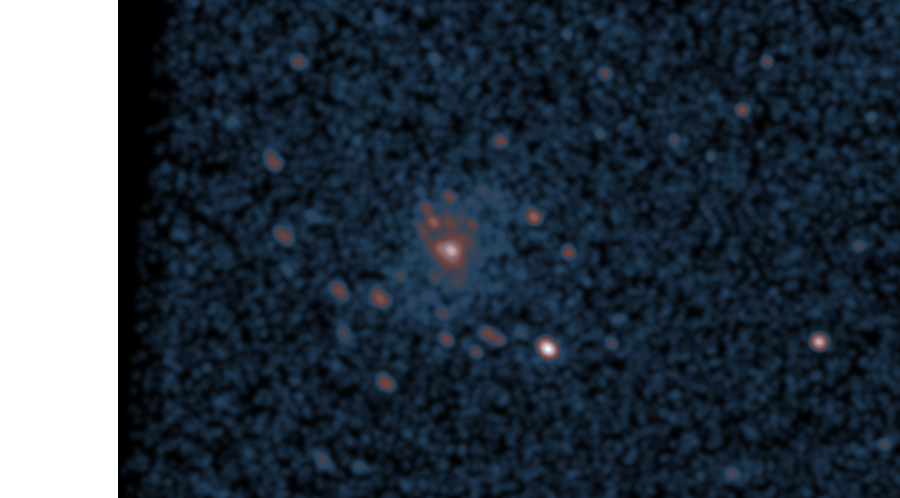

In [9]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mo/img.sm -scale log \
  -pan to 03:17:18.6 -41:06:28.4 fk5 \
  -cmap load sunset-in-atlantis.sao \
  -saveimage png mo/ngc1291.sm.png -exit

display < mo/ngc1291.sm.png
  

In [10]:
punlearn pathfinder
plist pathfinder
/bin/rm -rf pathfinder
mkdir pathfinder


Parameters for /home/kjg/cxcds_param4/pathfinder.par

        infile =                  Input image
       outfile =                  Output map image
       (minval = 0)               Minimum pixel value to consider in input image.
    (direction = diagonal)        Directions to follow gradient
     (debugreg = )                Diagnostic region file
      (verbose = 1)               Tool chatter level
      (clobber = no)              Remove output file if it already exists?
         (mode = ql)              



In [17]:
time pathfinder \
  infile=mo/img.sm \
  outfile=pathfinder/ngc1291.map \
  minval=0.1 \
  debugreg=pathfinder/ngc1291.reg \
  clob+

pathfinder
          infile = mo/img.sm
         outfile = pathfinder/ngc1291.map
          minval = 0.1
       direction = diagonal
        debugreg = pathfinder/ngc1291.reg
         verbose = 1
         clobber = yes
            mode = ql


real	0m8.715s
user	0m8.346s
sys	0m0.362s


In [18]:
dmimggrad pathfinder/ngc1291.map pathfinder/ngc1291.grad sobel mag clob+

In [19]:
dmmaskbin mo/img.sm pathfinder/ngc1291.map pathfinder/ngc1291.img clob+ 

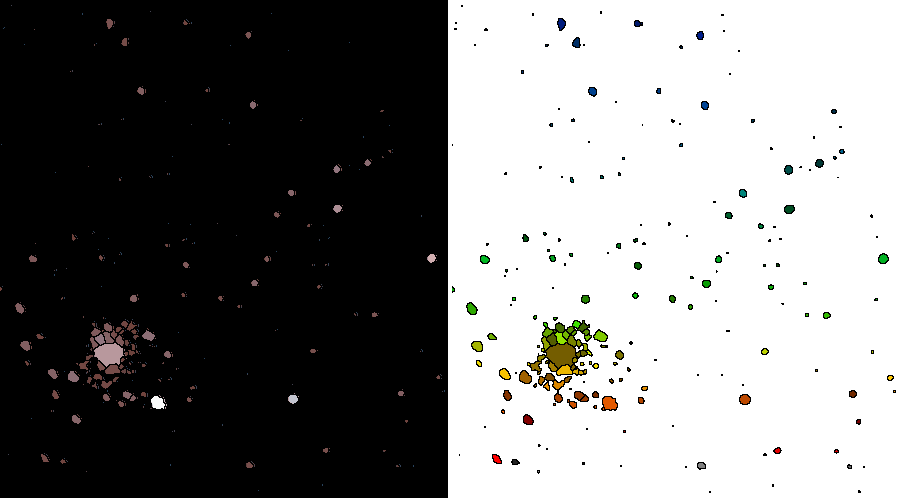

In [20]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  pathfinder/ngc1291.img -scale log \
  -pan to 03:17:18.6 -41:06:28.4 fk5 \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask pathfinder/ngc1291.grad -nomask \
  -block to 2 \
  pathfinder/ngc1291.map -scale linear \
  -pan to 03:17:18.6 -41:06:28.4 fk5 \
  -region delete all \
  -mask color black -mask pathfinder/ngc1291.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png pathfinder/ngc1291.abin.png -quit

display < pathfinder/ngc1291.abin.png

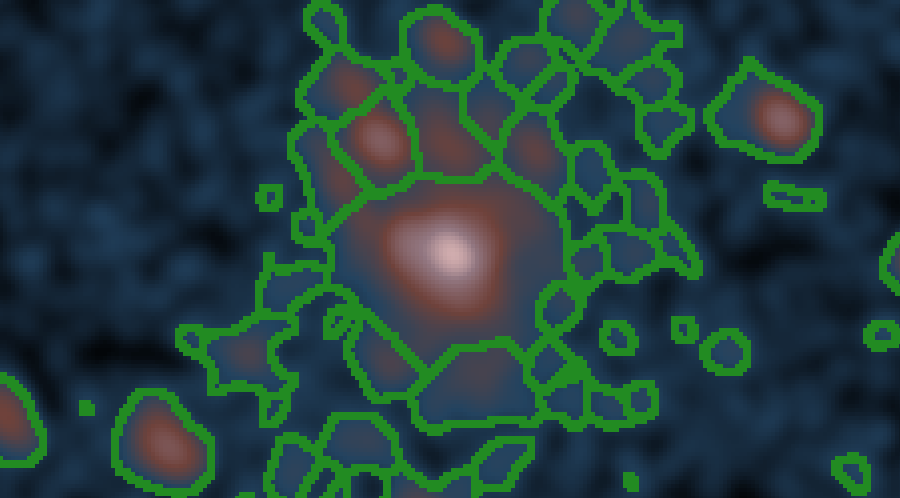

In [21]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mo/img.sm -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color forestgreen -mask pathfinder/ngc1291.grad -nomask \
  -zoom to 4 \
  -pan to 03:17:18.6 -41:06:28.4 fk5 \
  -saveimage png pathfinder/ngc1291.overlay.png -quit

display < pathfinder/ngc1291.overlay.png
  

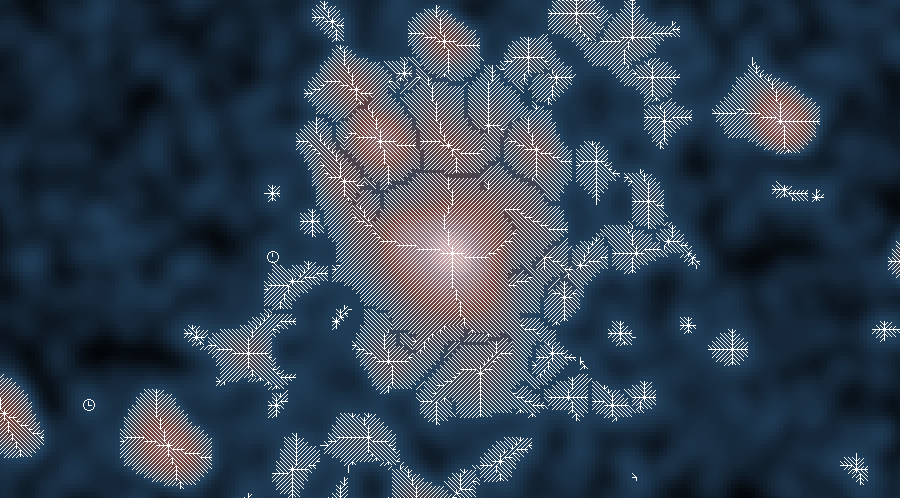

In [22]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mo/img.sm -scale log \
  -pan to 03:17:18.6 -41:06:28.4 fk5 \
  -cmap load sunset-in-atlantis.sao \
  -region pathfinder/ngc1291.reg -region select all -region color white -region select none \
  -zoom to 4 \
  -saveimage png pathfinder/ngc1291.path.png -quit

display < pathfinder/ngc1291.path.png
  